In [1]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import brownian
from brownian import u
from brownian import Cantilever

%matplotlib inline

In [2]:
f = h5py.File('brownian173033.h5', 'r')            

In [3]:
freq = f['x'][()]
PSD = f['y'][()]
PSD_std = f['y_std'][()]
PSD_err = PSD_std / (f['y'].attrs['n_avg']**0.5)  # Standard error

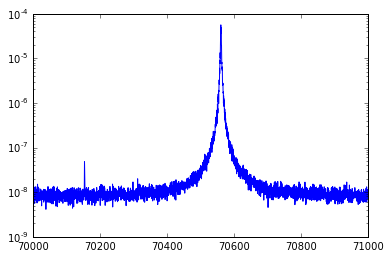

In [4]:
m = brownian.make_mask(freq, 70000, 71000)
plt.semilogy(freq[m], PSD[m])

In [5]:
cantilever = Cantilever(f_c=70.5*u.kHz,
                        Q=28000*u.dimensionless,
                        k_c=3.5*u.N/u.m)
bmf = brownian.BrownianMotionFitter(freq, PSD, PSD_err, 298, cantilever)

In [6]:
bmf.calc_fit(70300, 70800)


Residuals
-------------------------------------
        Mean: -8.21e-02
   Std. dev.: 2.06e-01


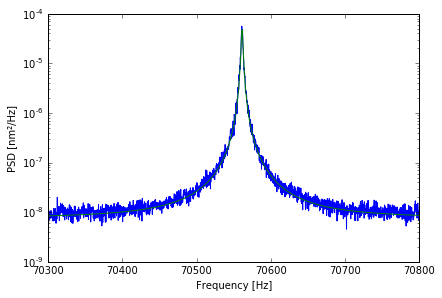

In [7]:
fig, ax = bmf.plot_fit()

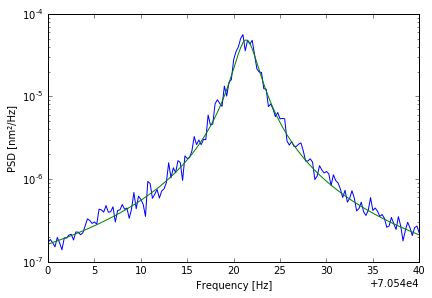

In [8]:
ax.set_xlim(70540, 70580)
ax.set_ylim(1e-7, 1e-4)
fig

(<matplotlib.figure.Figure at 0x1117e4090>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1133b89d0>)

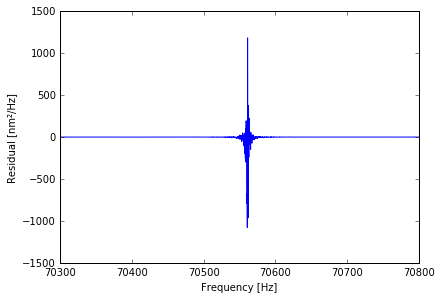

In [9]:
bmf.plot_residuals()

(<matplotlib.figure.Figure at 0x1133e2ed0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1135db510>)

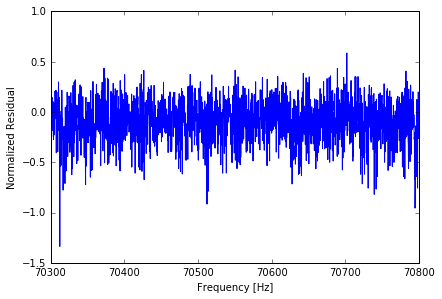

In [10]:
bmf.plot_reduced_residuals()

(<matplotlib.figure.Figure at 0x11360f490>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1135f0350>)

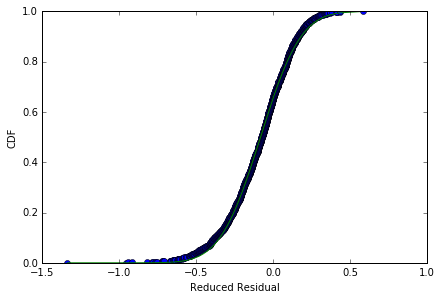

In [11]:
bmf.plot_cdf()

In [12]:
print(bmf.report())


    Input
    -----------------------------------------------
    Temperature           T: 298 kelvin

    Estimates
    -----------------------------------------------
    Spring constant     k_c: 3.5 newton/meter
    Resonance frequency f_c: 70.5 kilohertz
    Quality factor        Q: 28000 dimensionless
    
    Fitting
    -----------------------------------------------
    Fit frequency min f_min: 70300 hertz
    Fit frequency max f_max: 70800 hertz

    Results
    -----------------------------------------------
    Resonance frequency f_c: 70561.35(4) hertz
    Spring constant     k_c: 22.3(8) newton/meter
    Quality Factor        Q: 2.9(1)×10⁴ dimensionless
    Detector Noise         : 7.38(7)×10⁻⁹ nanometer²/hertz
            
